# Object Detection 

<a>https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API </a>

### Data Importation

In [2]:
import cv2
import matplotlib.pyplot as plt 

These models can be found here 

In [3]:
conf_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,conf_file)

## Get Labels 
Create a file named 'Label.txt' and copy all labels from this file:

In [5]:
classLabels = []
file_name = 'Label.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [6]:
classLabels[:5]

['person', 'bicycle', 'car', 'motorbike', 'aeroplane']

In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) # mobile net => [-1,1]
model.setInputSwapRB(True)


<dnn_Model 0x1161ad470>

### Read a file 

In [8]:
img = cv2.imread('car.jpeg')

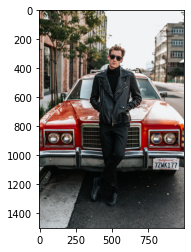

In [9]:
# show img with rgb channels 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
ClassIndex,confidence,bbox = model.detect(img,confThreshold=0.7)

In [11]:
print(ClassIndex) # it don't begin at 0 index 

[1]


In [12]:
# read the image before adding text on it if you test the function multiple time
img = cv2.imread('car.jpeg') 

In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),3)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]-20),font,fontScale=font_scale,color=(0,255,0),thickness=5)

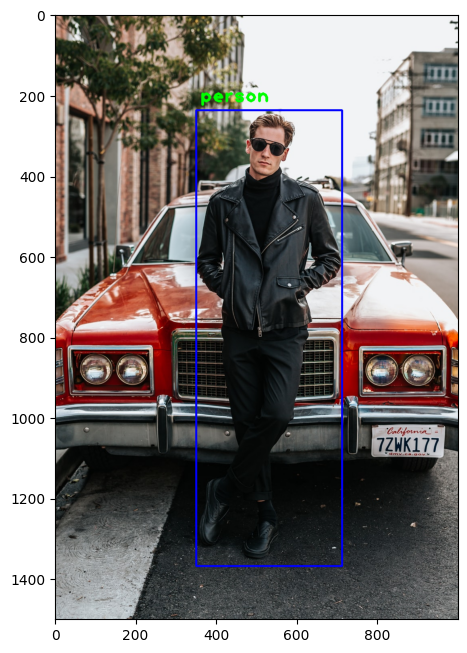

In [14]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Video 

In [ ]:
cap = cv2.VideoCapture('video.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0) # WebCam
    
if not cap.isOpened():
    raise IOError('Cannot open video')
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex,confidence,bbox = model.detect(frame,confThreshold=0.55)

    for ClassInd,conf,boxes in zip(ClassIndex,confidence,bbox):
        cv2.rectangle(frame,boxes,(255,0,0),3)
        cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]-20),font,fontScale=font_scale,color=(0,255,0),thickness=5)
        
    cv2.imshow("Detection",frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break